In [1]:
import numpy as np
import xarray as xr
import os.path as op
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as ocean
from dask.diagnostics import ProgressBar
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
ddir = '/swot/SUM05/takaya/MODIS/AQUA/chlor/monthly/oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Monthly/9km/chlor_a'

In [10]:
ds = xr.open_mfdataset(op.join(ddir,'*_chlor_a_9km.nc'), concat_dim=None)
# ds = xr.open_dataset(op.join(ddir, 'A20030012003008.L3m_8D_CHL_chlor_a_9km.nc'))
ds

MergeError: conflicting values for variable 'chlor_a' on objects to be combined:
first value: <xarray.Variable (lat: 2160, lon: 4320)>
dask.array<shape=(2160, 4320), dtype=float32, chunksize=(2160, 4320)>
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_chlorophyll_concentration_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    keywords:       EARTH SCIENCE > OCEANS > OCEAN CHEMISTRY > CHLOROPHYLL
    display_scale:  log
    display_min:    0.01
    display_max:    20.0
second value: <xarray.Variable (lat: 2160, lon: 4320)>
dask.array<shape=(2160, 4320), dtype=float32, chunksize=(2160, 4320)>
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_chlorophyll_concentration_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    keywords:       EARTH SCIENCE > OCEANS > OCEAN CHEMISTRY > CHLOROPHYLL
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

In [31]:
ds.chlor_a.attrs

OrderedDict([('long_name', 'Chlorophyll Concentration, OCI Algorithm'),
             ('units', 'mg m^-3'),
             ('standard_name',
              'mass_concentration_chlorophyll_concentration_in_sea_water'),
             ('valid_min', 0.001),
             ('valid_max', 100.0),
             ('reference',
              'Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans: A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.'),
             ('keywords',
              'EARTH SCIENCE > OCEANS > OCEAN CHEMISTRY > CHLOROPHYLL'),
             ('display_scale', 'log'),
             ('display_min', 0.01),
             ('display_max', 20.0)])

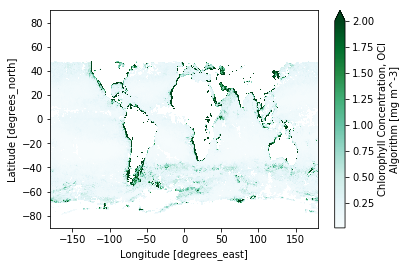

In [5]:
ds.chlor_a.plot(vmax=2., cmap='BuGn')

In [13]:
# years = range(2003,2017)
years = range(2011,2019)
# days = range(8,365,8)
nonleap = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
leap = np.array([31,29,31,30,31,30,31,31,30,31,30,31])
# Ndays = len(years)*len(days)

i = 0
for year in years:
    for j in range(12):

        if year % 4 == 0:
            fname = op.join(ddir, 'A%4d%03d%4d%03d.L3m_MO_CHL_chlor_a_9km.nc' 
                            % (year, (np.cumsum(leap)-leap)[j]+1, year, np.cumsum(leap)[j]))
        else:
            fname = op.join(ddir, 'A%4d%03d%4d%03d.L3m_MO_CHL_chlor_a_9km.nc' 
                            % (year, (np.cumsum(nonleap)-nonleap)[j]+1, year, np.cumsum(nonleap)[j]))
        print(fname)
        
        ds = xr.open_dataset(fname)
        data = ds.chlor_a
    
#         fig = plt.figure(figsize=(14,10))
#         fig.set_tight_layout(True)
#         ax = fig.add_subplot(1,1,1,projection=ccrs.Miller())
#         ax.add_feature(cfeature.LAND)
#         ax.pcolormesh(data.lon, data.lat, data, 
#                      vmax=2., vmin=0., 
# #                       norm=clr.LogNorm(), 
#                      rasterized=True, cmap='BuGn',
#                      transform=ccrs.PlateCarree())
# #         cs = ax.contourf(topo.lon, topo.lat, topo.where(topo>0.), 
# #                         cmap='pink',
# #                         levels=np.linspace(0,2000,20), extend='both',
# #                         transform=ccrs.PlateCarree())
# #         for c in cs.collections:
# #             c.set_rasterized(True)
#         ax.coastlines()
#         plt.savefig(op.join(ddir, '../Figs/Chl_MODIS_%4d-%03d.pdf' % (year, (day-4))))
#         plt.close(fig=fig)

        if year==years[0] and j==0:
            N = data.shape
            chlor = xr.DataArray(np.zeros((12*len(years),N[0],N[1])),
                                dims=['months','lat','lon'],
                                coords={'months':range(12*len(years)),'lat':data.lat,'lon':data.lon}
                                )
        chlor[i] = data
        i += 1
chlor

/swot/SUM05/takaya/MODIS/AQUA/chlor/monthly/oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Monthly/9km/chlor_a/A20110012011031.L3m_MO_CHL_chlor_a_9km.nc
/swot/SUM05/takaya/MODIS/AQUA/chlor/monthly/oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Monthly/9km/chlor_a/A20110322011059.L3m_MO_CHL_chlor_a_9km.nc
/swot/SUM05/takaya/MODIS/AQUA/chlor/monthly/oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Monthly/9km/chlor_a/A20110602011090.L3m_MO_CHL_chlor_a_9km.nc
/swot/SUM05/takaya/MODIS/AQUA/chlor/monthly/oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Monthly/9km/chlor_a/A20110912011120.L3m_MO_CHL_chlor_a_9km.nc
/swot/SUM05/takaya/MODIS/AQUA/chlor/monthly/oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Monthly/9km/chlor_a/A20111212011151.L3m_MO_CHL_chlor_a_9km.nc
/swot/SUM05/takaya/MODIS/AQUA/chlor/monthly/oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Monthly/9km/chlor_a/A20111522011181.L3m_MO_CHL_chlor_a_9km.nc
/swot/SUM05/takaya/MODIS/AQUA/chlor/monthly/oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mappe

<xarray.DataArray (months: 96, lat: 2160, lon: 4320)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * months   (months) int64 0 1 2 3 4 5 6 7 8 9 ... 87 88 89 90 91 92 93 94 95
  * lat      (lat) float32 89.958336 89.875 89.79167 ... -89.87501 -89.958336
  * lon      (lon) float32 -179.95833 -179.875 ... 179.87502 179.95836

In [15]:
chlor.coords['month'] = ('months',np.tile(range(12),len(years)))
chlor

<xarray.DataArray (months: 96, lat: 2160, lon: 4320)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * months   (months) int64 0 1 2 3 4 5 6 7 8 9 ... 87 88 89 90 91 92 93 94 95
  * lat      (lat) float32 89.958336 89.875 89.79167 ... -89.87501 -89.958336
  * lon      (lon) float32 -179.95833 -179.875 ... 179.87502 179.95836
    month    (months) int64 0 1 2 3 4 5 6 7 8 9 10 ... 1 2 3 4 5 6 7 8 9

In [20]:
grouped = chlor.groupby('month')
chl_mon = xr.DataArray(np.empty((12,2160,4320)), dims=['month','lat','lon'],
                      coords={'month':range(12),'lat':chlor.lat.data,'lon':chlor.lon.data}
                      )
for group in grouped:
#     print(group)
    chl_mon[group[0]] = np.nanmean(group[1], axis=0)
chl_mon

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


<xarray.DataArray (month: 12, lat: 2160, lon: 4320)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * lat      (lat) float32 89.958336 89.875 89.79167 ... -89.87501 -89.958336
  * lon      (lon) float32 -179.95833 -179.875 ... 179.87502 179.95836

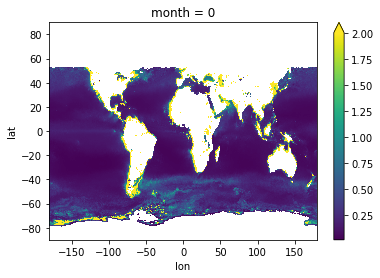

In [22]:
chl_mon[0].plot(vmax=2.)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


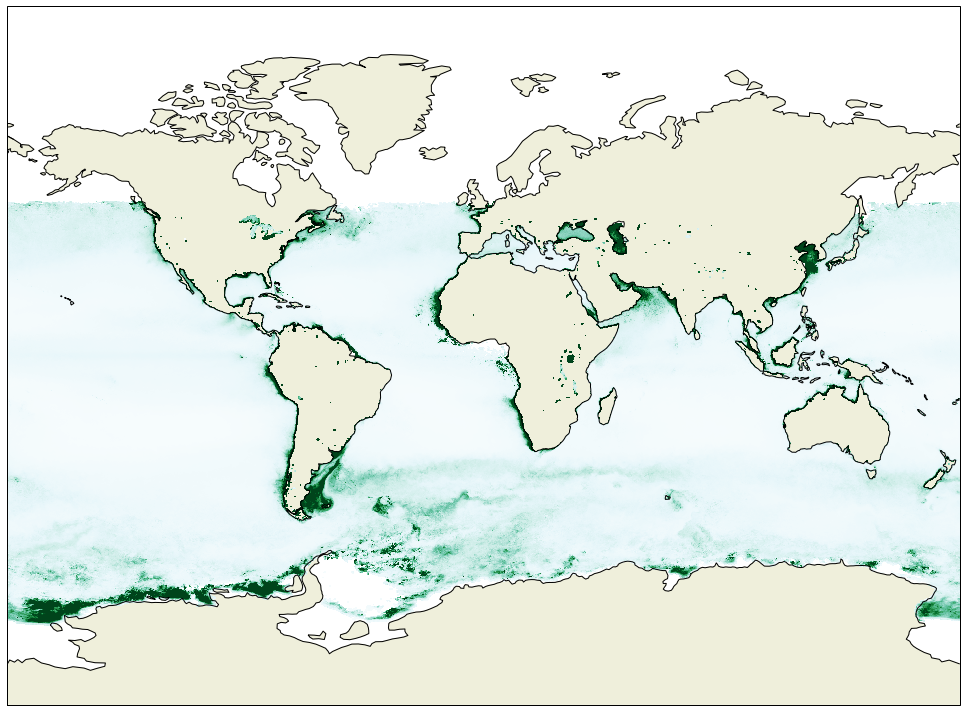

In [27]:
fig = plt.figure(figsize=(14,10))
fig.set_tight_layout(True)
ax = fig.add_subplot(1,1,1,projection=ccrs.Miller())
ax.add_feature(cfeature.LAND)
ax.pcolormesh(chl_mon.lon, chl_mon.lat, chl_mon[0], 
             vmax=2., vmin=0., 
#                       norm=clr.LogNorm(), 
             rasterized=True, cmap='BuGn',
             transform=ccrs.PlateCarree())
#         cs = ax.contourf(topo.lon, topo.lat, topo.where(topo>0.), 
#                         cmap='pink',
#                         levels=np.linspace(0,2000,20), extend='both',
#                         transform=ccrs.PlateCarree())
#         for c in cs.collections:
#             c.set_rasterized(True)
ax.coastlines()
plt.savefig(op.join(ddir, '/swot/SUM05/takaya/MODIS/AQUA/chlor/Figs/Chl_MODIS_monclim_%02d.pdf' % (0+1)))
#     plt.close(fig=fig)

In [28]:
for i in range(12):
    print(i)
    fig = plt.figure(figsize=(14,10))
    fig.set_tight_layout(True)
    ax = fig.add_subplot(1,1,1,projection=ccrs.Miller())
    ax.add_feature(cfeature.LAND)
    ax.pcolormesh(chl_mon.lon, chl_mon.lat, chl_mon[i], 
                 vmax=2., vmin=0., 
#                       norm=clr.LogNorm(), 
                 rasterized=True, cmap='BuGn',
                 transform=ccrs.PlateCarree())
#         cs = ax.contourf(topo.lon, topo.lat, topo.where(topo>0.), 
#                         cmap='pink',
#                         levels=np.linspace(0,2000,20), extend='both',
#                         transform=ccrs.PlateCarree())
#         for c in cs.collections:
#             c.set_rasterized(True)
    ax.coastlines()
    plt.savefig(op.join(ddir, '/swot/SUM05/takaya/MODIS/AQUA/chlor/Figs/Chl_MODIS_monclim_%02d.png' % (i+1)))
    plt.close(fig=fig)

0
1
2
3
4
5
6
7
8
9
10
11


In [5]:
topo = xr.open_dataset('/home/rdussin/etopo5.nc')
lon = topo.topo_lon.data
lon[lon<0] += 360
topo = xr.DataArray(topo.topo.data, dims=['lat','lon'],
                   coords={'lat':topo.topo_lat.data,'lon':lon})

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


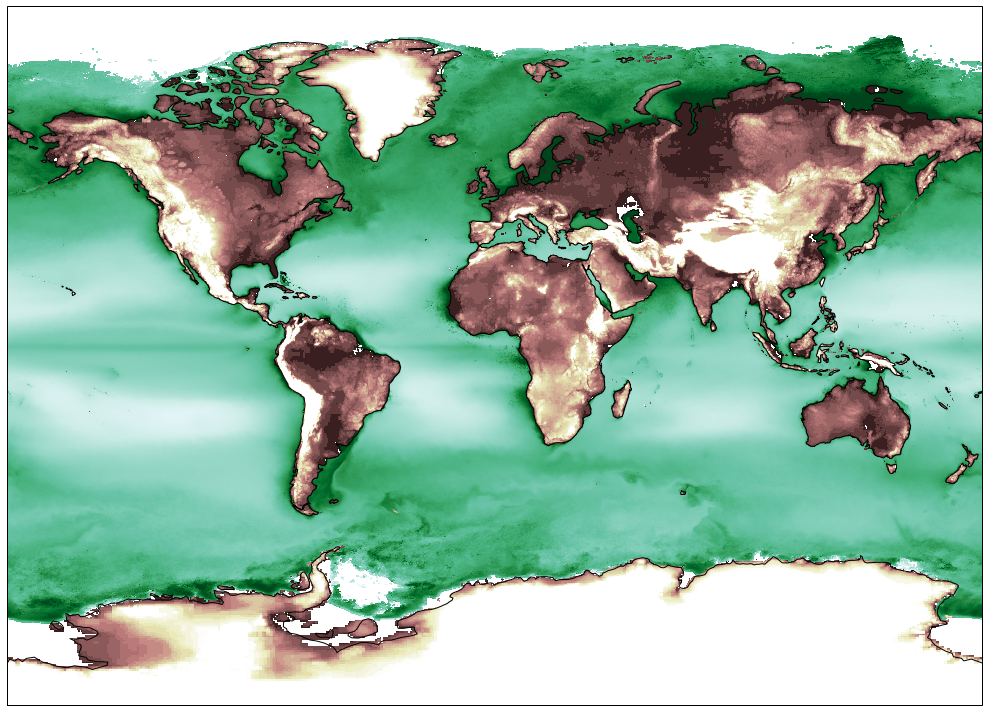

In [15]:
fig = plt.figure(figsize=(14,10))
fig.set_tight_layout(True)
ax = fig.add_subplot(1,1,1,projection=ccrs.Miller())
ax.pcolormesh(chl_mean.lon, chl_mean.lat, chl_mean, 
             vmax=4., vmin=0.01, norm=clr.LogNorm(), rasterized=True, cmap='BuGn',
             transform=ccrs.PlateCarree())
cs = ax.contourf(topo.lon, topo.lat, topo.where(topo>0.), 
                cmap='pink',
                levels=np.linspace(0,2000,20), extend='both',
                transform=ccrs.PlateCarree())
for c in cs.collections:
    c.set_rasterized(True)
ax.coastlines()
plt.savefig(op.join(ddir, '../Chl_MODIS_climatology.pdf'))

In [85]:
years = np.repeat(range(2003,2017),45)
chlor.coords['year'] = ('days',years)

chlor

<xarray.DataArray (days: 630, lat: 420, lon: 4320)>
array([[[0.180184, 0.184326, ..., 0.183399, 0.187141],
        [0.183446, 0.184785, ..., 0.185527, 0.184687],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[0.22559 , 0.229298, ...,      nan, 0.171378],
        [0.191439, 0.210183, ..., 0.201158, 0.171761],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       ...,

       [[0.243432, 0.237535, ..., 0.224322, 0.238421],
        [0.257538, 0.263837, ..., 0.21788 , 0.229495],
        ...,
        [0.403554, 0.404394, ..., 0.405977, 0.406144],
        [0.388681, 0.389433, ..., 0.411245, 0.412437]],

       [[0.382712, 0.396518, ..., 0.193306, 0.19563 ],
        [0.218835, 0.202904, ..., 0.227216, 0.227117],
        ...,
        [0.888256, 0.886321, ..., 0.882515, 0.892219],
        [     nan,      nan, ..., 0.683369, 0.683095

In [78]:
chlor.to_dataset(name='Chl_a').to_netcdf(op.join(ddir,'MODIS-SO_40-705S_Chl-a.nc'))

In [25]:
chlor_ker = chlor.sel(lon=slice(100,150))

In [28]:
print(len(days), len(years))

45 14


/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


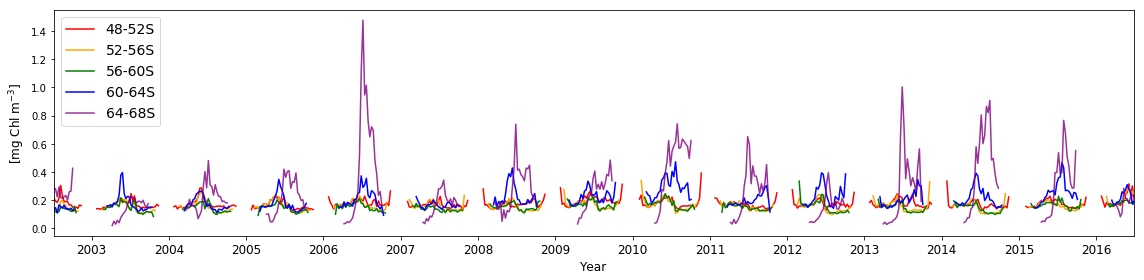

In [87]:
# month = np.tile(['','','J','','','F','','','M','','','','A','','','','M','','','','J','',
#                  '','J','','','','A','','','','S','','','','O','','','','N','','','','D',''],
#                len(years))
# month = np.tile(['J','F','M','A','M','J','J','A','S','O','N','D'], len(years))
# tick = np.array([2,5,8,12,16,20,23,27,31,35,39,43])
# for i in range(1,len(years)):
#     if i == 1:
#         ticks = tick
#     ticks = np.append(ticks, tick+45*i)
colors = ['r','orange','g','b','purple']

ticks = np.zeros(len(range(2003,2017)))
for i in range(len(range(2003,2017))):
    ticks[i] = 22+45*i

fig, ax = plt.subplots(figsize=(16,4))
fig.set_tight_layout(True)
chlor_ker.sel(lat=slice(-48,-52)).mean(['lat','lon']).plot(ax=ax, label=r'48-52S', color=colors[0])
chlor_ker.sel(lat=slice(-52,-56)).mean(['lat','lon']).plot(ax=ax, label=r'52-56S', color=colors[1])
chlor_ker.sel(lat=slice(-56,-60)).mean(['lat','lon']).plot(ax=ax, label=r'56-60S', color=colors[2])
chlor_ker.sel(lat=slice(-60,-64)).mean(['lat','lon']).plot(ax=ax, label=r'60-64S', color=colors[3])
chlor_ker.sel(lat=slice(-64,-68)).mean(['lat','lon']).plot(ax=ax, label=r'64-68S', color=colors[4], alpha=0.8)
ax.set_xticks(ticks)
ax.set_xticklabels(range(2003,2017), fontsize=12)
ax.set_xlim([0,Ndays-1])
ax.set_xlabel(r'Year', fontsize=12)
ax.set_ylabel(r'[mg Chl m$^{-3}$]', fontsize=12)
ax.legend(loc='upper left', fontsize=14)
plt.savefig(op.join(ddir,'MODIS_Chlor-a_2003-2016.pdf'))

In [41]:
day8 = np.tile(range(45), len(years))
chlor_ker.coords['iDAY'] = ('days', day8)

with ProgressBar():
    chl_ker_mon = chlor_ker.groupby('iDAY').mean('days').compute()
    
chl_ker_mon

<xarray.DataArray (iDAY: 45, lat: 420, lon: 600)>
array([[[0.179937, 0.176644, ..., 0.209406, 0.204807],
        [0.177186, 0.177775, ..., 0.211522, 0.209256],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[0.200863, 0.201166, ..., 0.273122, 0.296417],
        [0.251552, 0.244089, ..., 0.262432, 0.247518],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       ...,

       [[0.13713 , 0.139025, ..., 0.360879, 0.360537],
        [0.145471, 0.14287 , ..., 0.380746, 0.361769],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[0.159559, 0.165334, ..., 0.299193, 0.306303],
        [0.154664, 0.161955, ..., 0.312598, 0.318018],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]]

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


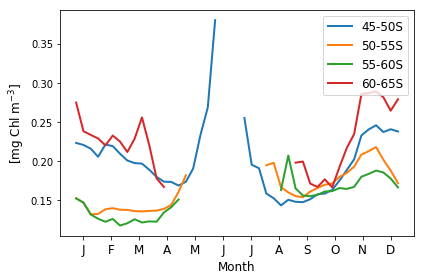

In [80]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, ax = plt.subplots(figsize=(6,4))
fig.set_tight_layout(True)
chl_ker_mon.sel(lat=slice(-45,-50)).mean(['lat','lon']).plot(ax=ax, label=r'45-50S', lw=2)
chl_ker_mon.sel(lat=slice(-50,-55)).mean(['lat','lon']).plot(ax=ax, label=r'50-55S', lw=2)
chl_ker_mon.sel(lat=slice(-55,-60)).mean(['lat','lon']).plot(ax=ax, label=r'55-60S', lw=2)
chl_ker_mon.sel(lat=slice(-60,-65)).mean(['lat','lon']).plot(ax=ax, label=r'60-65S', lw=2)
# chl_ker_mon.sel(lat=slice(-65,-70)).mean(['lat','lon']).plot(ax=ax, label=r'65-70S', lw=2)
ax.set_xticks(np.linspace(1,43,12))
ax.set_xticklabels(month, fontsize=12)
# ax.set_xlim([0,Ndays-1])
ax.set_xlabel(r'Month', fontsize=12)
ax.set_ylabel(r'[mg Chl m$^{-3}$]', fontsize=12)
ax.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(ddir,'MODIS_Chlor-a_2003-2016_clim.pdf'))